# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

Sample log-like: 348.3716154622631
Sample log-like: 348.4219823000043
Sample log-like: 348.3731908296663
Sample log-like: 348.30788494308416
Sample log-like: 348.3576305171715
Sample log-like: 348.39864358990945
Sample log-like: 348.31224260781653
Sample log-like: 348.35469618853125
Sample log-like: 348.2023177889974
Sample log-like: 348.37505754061084
Sample log-like: 348.3650791784804
Sample log-like: 348.32881431409805
Sample log-like: 348.3701360989505
Sample log-like: 348.2465284504393
Sample log-like: 348.36864899870346
Sample log-like: 348.33139469595227
Sample log-like: 348.33444566402954
Sample log-like: 348.35888172028257
Sample log-like: 348.2725936459492
Sample log-like: 348.25930467586636
Sample log-like: 348.1805906339572
Sample log-like: 348.39301289312664
Sample log-like: 348.39199596938033
Sample log-like: 348.36755321467956
Sample log-like: 348.3986949404098
Sample log-like: 348.35474759332624
Sample log-like: 348.39983312398175
Sample log-like: 348.37537983878644
Sam

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


0.0 percent complete
0.5 percent complete
1.0 percent complete
1.5 percent complete
2.0 percent complete
2.5 percent complete
3.0 percent complete
3.5 percent complete
4.0 percent complete
4.5 percent complete
5.0 percent complete
5.5 percent complete
6.0 percent complete
6.5 percent complete
7.0 percent complete
7.5 percent complete
8.0 percent complete
8.5 percent complete
9.0 percent complete
9.5 percent complete
10.0 percent complete
10.5 percent complete
11.0 percent complete
11.5 percent complete
12.0 percent complete
12.5 percent complete
13.0 percent complete
13.5 percent complete
14.0 percent complete
14.5 percent complete


c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\bioscrape\pid_interfaces.py:151: RuntimeWarning: overflow encountered in exp
  params_exp = np.exp(log_params)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:77: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C


15.0 percent complete
15.5 percent complete
16.0 percent complete
16.5 percent complete
17.0 percent complete
17.5 percent complete
18.0 percent complete
18.5 percent complete
19.0 percent complete
19.5 percent complete
20.0 percent complete
20.5 percent complete
21.0 percent complete
21.5 percent complete
22.0 percent complete
22.5 percent complete
23.0 percent complete
23.5 percent complete
24.0 percent complete
24.5 percent complete
25.0 percent complete
25.5 percent complete
26.0 percent complete
26.5 percent complete
27.0 percent complete
27.5 percent complete
28.0 percent complete
28.5 percent complete
29.0 percent complete
29.5 percent complete
30.0 percent complete
30.5 percent complete
31.0 percent complete
31.5 percent complete
32.0 percent complete
32.5 percent complete
33.0 percent complete
33.5 percent complete
34.0 percent complete
34.5 percent complete
35.0 percent complete
35.5 percent complete
36.0 percent complete
36.5 percent complete
37.0 percent complete
37.5 perce

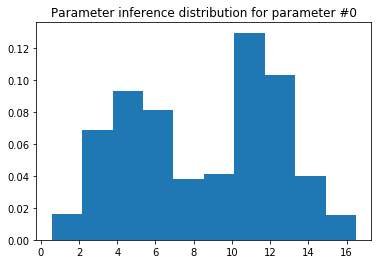

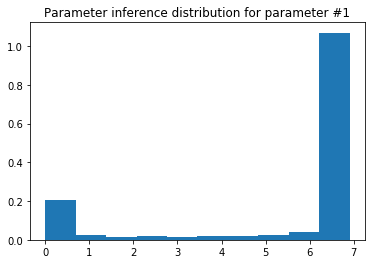

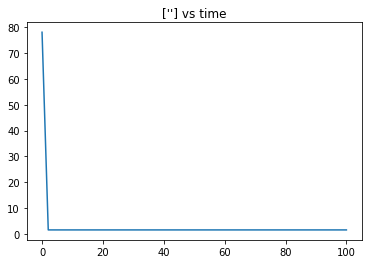

In [4]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd

pid = initialize_mcmc()
# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
pid.M = Model('models/toy_model.xml')


# Import data from CSV
data_list = []
data = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X', 'time'], skiprows = 1)
data_list.append(list(data.get('X')))
pid.exp_data = np.array(data_list)


pid.prior = {'k1' : ['uniform', 1e-2, 1e3],'d1' : ['gaussian', 0.2, 1000, 1e-4]}
pid.params_to_estimate = {'k1':10, 'd1':0.2}
pid.timepoints = np.linspace(0, 100, 50)

pid.type = 'deterministic'


fitted_model, params = pid.run_mcmc(plot_show = True, progress = True)

### Plot the results 

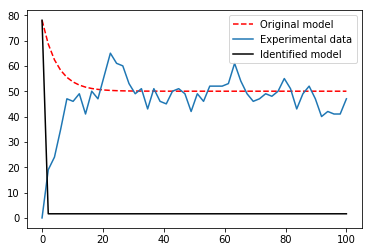

In [5]:
timepoints = pid.timepoints
M_original = Model('models/toy_model.xml')
sim_x = py_simulate_model(timepoints, Model = M_original, stochastic = False)
sim_x_inf = py_simulate_model(timepoints, Model = fitted_model, stochastic = False)
plt.plot(timepoints, sim_x['X'], 'r--', label = 'Original model')
plt.plot(timepoints, data.get('X'), label = 'Experimental data')
plt.plot(timepoints, sim_x_inf['X'], 'k', label = 'Identified model')

plt.legend()

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.